### Covid Statistics Notebook 

  
                                         
                                         
                                    Author: Tomás von Bischoffshausen 
                                                   January, 2022                                                              

***

### 1. Understand Client Requierment

##### 1.1 General Requirement

- Create a graph similar to the one present in the documment "Le rappel vaccinal réduit fortement le risque de décès lié au Covid-19, 17.12.21), before Annexe (pg15).
    - Line plot representing three variable in four quadrants.
    - Data have to represent information from dec, 14, 2021 untill the most recent date.

- Creating this graph uses three data sources that shoud be integrated in order to create it.

##### 1.3 Specific Graph wanted

- Line chart 

- From 14th of december untill the most recent date.

- With the evolution of:
    - Vaccine avec rappel (line1)
    - Vaccine avec sans rappel(line 2)
    - Non Vaccines (line 3)

- Crossed by:
    - test positives (quadrant 1)
    - test positive with sympthomes (quadrant 2)
    - conventional hospitalization (quadrant 3)
    - critical hospitalization (quadrant 4)

##### 1.4 Data Sources where I can find the variables in order to create the graph

- Data Source 1 (dataset): https://www.data.gouv.fr/fr/datasets/synthese-des-indicateurs-de-suivi-de-lepidemie-covid-19/

- Data Source 2 (dataset): https://www.data.gouv.fr/fr/datasets/indicateurs-de-suivi-de-lepidemie-de-covid-19/

- Data Source 3(datasets repository): https://www.data.gouv.fr/fr/organizations/sante-publique-france/#datasets


***

### 2. Find the variables in the data sources provided by the client

##### 2.1 Data Source 1: Dataset with data related to the COVID-19 epidemic in France: overview.

url: https://www.data.gouv.fr/fr/datasets/donnees-relatives-a-lepidemie-de-covid-19-en-france-vue-densemble/

In [116]:
import pandas as pd

In [117]:
dataset_1 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/5c4e1452-3850-4b59-b11c-3dd51d7fb8b5")
dataset_1.head(3)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,dep,date,reg,lib_dep,lib_reg,tx_pos,tx_incid,TO,R,hosp,...,dchosp,reg_rea,incid_hosp,incid_rea,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,cv_dose1
0,01,2020-03-18,84,Ain,Auvergne et Rhône-Alpes,nan,nan,0.06,nan,2,...,0,35,nan,nan,nan,nan,nan,nan,nan,nan
1,01,2020-03-19,84,Ain,Auvergne et Rhône-Alpes,nan,nan,0.13,nan,2,...,0,79,1.00,0.00,0.00,0.00,44.00,nan,nan,nan
2,01,2020-03-20,84,Ain,Auvergne et Rhône-Alpes,nan,nan,0.16,nan,2,...,0,87,0.00,0.00,1.00,0.00,16.00,nan,nan,nan


**Quantity of departments in the dataset**

In [5]:
departments_Q = dataset_1.dep.nunique()
print("The quantity of departments in the dataset is: " + str(departments_Q))

The quantity of departments in the dataset is: 102


**Names of the departments present in the dataset**

In [6]:
departments_N = dataset_1.dep.unique()
print("The names of the departments present in the dataset are: \n\n" + str(departments_N))

The names of the departments present in the dataset are: 

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '2A' '2B' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84
 85 86 87 88 89 90 91 92 93 94 95 971 972 973 974 976]


**Quantity of Regions in the dataset**

In [7]:
regions_Quantity = dataset_1["reg"].nunique()
print("The number of regions in the dataset is: "+str(regions_Quantity))

The number of regions in the dataset is: 18


**Names of the regions present in the dataset**

In [8]:
regions_name = dataset_1.reg.unique()
print("\nThis are the regions names that the dataset contains: " + str(regions_name))


This are the regions names that the dataset contains: [84 32 93 44 76 28 75 24 27 53 94 52 11  1  2  3  4  6]


**Data Dates**

In [9]:
print("This dataset contains data from " + dataset_1.date.min() + " to " + dataset_1.date.max())

This dataset contains data from 2020-03-18 to 2022-01-18


**Data Columns**

In [10]:
print("The dataset contains the following columns:")
dataset_1.columns

The dataset contains the following columns:


Index(['dep', 'date', 'reg', 'lib_dep', 'lib_reg', 'tx_pos', 'tx_incid', 'TO',
       'R', 'hosp', 'rea', 'rad', 'dchosp', 'reg_rea', 'incid_hosp',
       'incid_rea', 'incid_rad', 'incid_dchosp', 'reg_incid_rea', 'pos',
       'pos_7j', 'cv_dose1'],
      dtype='object')

**Columns Descriptions**

'date' = Date 
'dep'= Department 
'reg'= Region 
'lib_dep' = department tag 
'lib_reg'= region tag 

Data relating to the hospital situation

- 'hosp'= Number of patients currently hospitalized for COVID-19. 

- 'incid_hosp' = Number of new patients hospitalized in the last 24 hours. 

- 'rea' = Number of patients currently in intensive care or intensive care. 

- 'incid_rea' = Number of new patients admitted to intensive care during the last 24 hours. 

- 'rad' = Cumulative number of patients who have been hospitalized for COVID-19 and returned home due to better health. 

- 'incid_rad'= Returns of new housing in the last 24 hours.

- COVID-19 death data*

- 'dchosp'= hospital death 'incid_dchosp' = New patients who died in the hospital during the last 24 hours. 

- 'esms_dc'= Death in ESMS 

- 'dc_tot'= Accumulation of deaths (accumulation of deaths observed in hospitals and nursing homes) 

Test data

- 'conf'= Number of confirmed cases 

- 'conf_j1' = Number of new confirmed cases (D-1 date of results) 

- 'pos'= Number of people declared positive (D-3 sampling date) 

- 'pos_7j' = Number of people declared positive in a week (D-3 sampling date) 

- 'esms_cas' = Confirmed cases in ESMS Note: The history of confirmed cases in EHPAD and ESMS is not included in this file. They are available in this dataset.

Data relating to indicators for monitoring the COVID-19 epidemic

- 'tx_pos' = Positivity rate of virological tests (The positivity rate corresponds to the number of people who tested positive (RT-PCR and antigen test) for the first time in more than 60 days compared to the total number of people who tested positive or negative in a given period; and who have never tested positive in the previous 60 days). 

- 'tx_incid' = Incidence rate (epidemic activity: The incidence rate corresponds to the number of people who tested positive (RT-PCR and antigen test) for the first time in more than 60 days relative to the size of the population. It is expressed per 100,000 inhabitants)

- 'OT' = Occupancy rate: hospital pressure on resuscitation capacity (Proportion of COVID-19 patients currently in intensive care, intensive care or in a continuous monitoring unit compared to total beds in initial capacity, i.e. before increasing resuscitation capacity beds in a hospital). 

- 'R'= Virus reproduction factor (evolution of R0: The reproduction number of the virus: is the average number of people that an infected person can contaminate. If the effective R is greater than 1, the epidemic develops; is less than 1, the epidemic is decreasing)

###### 2.2  Data Source 2: Dataset with Monitoring indicators of the COVID-19 epidemic
    
url: https://www.data.gouv.fr/fr/datasets/indicateurs-de-suivi-de-lepidemie-de-covid-19/

In [11]:
dataset_2 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/381a9472-ce83-407d-9a64-1b8c23af83df")
dataset_2.head()

,extract_date,tx_incid,R,taux_occupation_sae,tx_pos
0,2020-03-18,NaN,NaN,15.2,NaN
1,2020-03-19,5.570823,NaN,19.8,NaN
2,2020-03-20,8.403950,NaN,25.6,NaN
3,2020-03-21,11.013409,NaN,28.7,NaN
4,2020-03-22,13.600502,NaN,33.1,NaN


**Data Dates**

In [12]:
print("This dataset contains data from " + dataset_2.extract_date.min() + " to " + dataset_2.extract_date.max())

This dataset contains data from 2020-03-18 to 2022-01-18


**Data Columns**

In [13]:
print("The dataset contains the following columns:")
dataset_2.columns

The dataset contains the following columns:


Index(['extract_date', 'tx_incid', 'R', 'taux_occupation_sae', 'tx_pos'], dtype='object')

**Columns Description**

On May 28, 2020, the government presented as part of the second stage of the deconfinement plan, the summary map of the departments that serves as a reference for the differentiated measures applied since June 2. This map is constructed from 4 indicators and is complemented by a risk analysis. The indicators are as follows: 


- "tx_incid": Epidemic activity (incidence rate). The incidence rate corresponds to the number of people who tested positive (RT-PCR and antigen test) for the first time in more than 60 days compared to the size of the population. It is expressed per 100,000 inhabitants and allows to compare geographical areas with each other.Three levels have been established for this indicator: green: fewer than 10 people tested positive out of 100,000 people tested, for a continuous week; orange: more than 10 people tested positive out of 100,000 people tested, for a continuous week; Red: More than 50 people tested positive out of 100,000 people tested, during a mobile week. 


- "R": Positive rate of virological tests. The positivity rate corresponds to the number of people who tested positive (RT-PCR and antigen test) for the first time in more than 60 days compared to the total number of people who tested positive or negative in a given period; and have never tested positive in the previous 60 days. Three levels have been established for this indicator: green: positivity rate between 0 and 5%; orange: positivity rate between 5 and 10%; red: positivity rate above 10%.


- "taux_occupation_sae": Virus reproduction factor (evolution of R0). The reproduction number of the virus: This is the average number of people that an infected person can infect. If the effective R is greater than 1, the epidemic develops; if it is less than 1, the epidemic decreases. This indicator, stopped on Tuesday and updated on Thursday, is an indicator of the epidemiological situation of approximately 7 days before and should be interpreted in the light of data detection and reporting activities. The indicator is updated once a week. Three levels have been established for this indicator: Green: R0 between 0 and 1; Orange: R0 between 1 and 1.5; Red: R0 greater than 1.5.


- "tx_pos": Hospital pressure on resuscitation capacity. This indicator reflects the level of demand for resuscitation but also the level of stress on the hospital's resuscitation capabilities. This is the proportion of COVID-19 patients currently in intensive care, intensive care or in a continuous monitoring unit compared to the total number of beds in initial capacity, i.e. before increasing the capacity of resuscitation beds in a hospital. Three levels have been established for this indicator: Green: occupancy rate between 0 and 30%; Orange: occupancy rate between 30 and 60%; Red: occupancy rate above 60%. Description of the data The data made available present the daily value of these 4 indicators at the national and departmental level since March 15, 2020. Frequency of data refresh: daily.

#####  2.3 Data Source 3: Repository with datasets with France Public  Health data
url: http://localhost:8888/notebooks/Documents/covid%20work/Untitled.ipynb?kernel_name=python3#Dataset-3:-Salud-p%C3%BAblica-Francia

This repository contains different datasets with covid data.

##### 2.4 Conclusion from the search of variables in the datasets provided by the client

An analysis made over the data sources given by the client in order to generate the graph required shows that not all the required variables are present in those datasets. There is data for test status and type of hospitalization from 2020-03-18 to 2022-01-11, but there is no data about the vaccinated status.

Vaccinated Status:
    - not present in the any data source.

Test status:
    - present in dataset 1 in this columns:
        - 'conf'= Number of confirmed cases
        - 'conf_j1' = Number of new confirmed cases (D-1 date of results)
        - 'pos'= Number of people declared positive (D-3 sampling date)
        - 'pos_7j' = Number of people declared positive in a week (D-3 sampling date)
        - 'esms_cas' = Confirmed cases in ESMS

Type of hospitalization:
    - present in dataset 1 in this columns:
        - 'hosp'= Number of patients currently hospitalized for COVID-19.
        - 'incid_hosp' = Number of new patients hospitalized in the last 24 hours.
        - 'rea' = Number of patients currently in intensive care or intensive care.
        - 'incid_rea' = Number of new patients admitted to intensive care during the last 24 hours.
        - 'rad' = Cumulative number of patients who have been hospitalized for COVID-19 and returned home due to better health.
        - 'incid_rad'= Returns of new housing in the last 24 hours.


##### 2.5 Suggestion

Given there is no variables about vaccination status, and taking in account that the authors of the document provided by the clent estimates that variable, I suggest that the next step would be to read the document carefully and understand how and whith which data the authors estimated the vaccinated status variable in order to create the last graph of the document.

***

### 3. Data Sources Analysis of the Study: "Vaccine booster greatly reduces risk of death from Covid-19, Pairings between the SI-VIC, SI-DEP and VAC-SI databases until December 5, 2021" 

##### 3.1 Findings

"The results presented here come from the use of the matches between the data of:
- SI-VIC, database on conventional hospitalizations or in critical care (resuscitation,
intensive and continuing care) of patients hospitalized for or positive for the Covid-19 test.
- SI-DEP, database on the results of screening tests for the SARS-CoV-2 virus,
- VAC-SI, database on Covid-19 vaccinations.

url = https://data.drees.solidarites-sante.gouv.fr/explore/dataset/covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si/information/?disjunctive.vac_statut

The counts resulting from the pairing of the three databases SI-VIC, SI-DEP, VAC-SI relate to persons whose age is indicated. 

In addition, hospital events (entry into hospital conventional, entry into critical care, death) are recorded on the date of occurrence. 

With the exception of the columns "Hospital admissions and deaths - All" of Table 1, all hospital event statistics presented are based on people for whom at least least one positive RT-PCR test was identified between 21 days before hospitalization and 21 days after the hospital event (or the date of data extraction for the most recent statistics).

This restriction of scope to patients admitted to hospital or deceased for whom a positive test has been
identified explains the difference observed between the “Total” and “including RT-PCR positive” columns of the section “Hospital admissions and deaths”.

The counts resulting from the pairing of the three databases SI-VIC, SI-DEP, VAC-SI relate to persons whose age is indicated. In addition, hospital events (entry into hospital conventional, entry into critical care, death) are recorded on the date of occurrence. 

The deaths of Covid-19 positive patients are those occurring in hospital (including in other services than those of conventional hospitalization and critical care , and that the Covid-19 either the reason for hospitalization or not ), recorded in SI-VIC and concerning only admitted patients in the hospital after May 15 - in order to focus the analysis on the events started from the fourth epidemic wave. In practice, the numbers of deaths over the period under review (which starts in July) of people admitted to hospital before May 15 are very low. 

In addition, the counts presented here (“death / total” column of Table 1) are on the date of occurrence
and resulting from pairings; they therefore do not coincide with unmatched and dated data registration published by Public Health France.

In line with the choices made by Public Health France with regard to major categories 4, the vaccination status of the patients was defined according to four modalities, the contours of which vary according to the vaccine used and the patients' history of Covid-19: for vaccinations without a history of Covid-19 with non-single-dose vaccines (excluding Janssen):
- Not vaccinated (0): person who has never received an injection of vaccine against SARS-CoV-2 - Recent first dose (1-): person having received a first dose for 14 days or less
- First effective dose (1+): person having received a first dose for more than 14 days or
having received a second dose for 7 days or less
- Complete vaccination (C): person having received a second dose 5 for more than 7 days
for vaccinations without a history of Covid-19 with a single dose vaccine (Janssen):
- Not vaccinated (0): person who has never received an injection of vaccine against SARS-CoV-2 - Recent first dose (1-): person who has received a dose of Janssen for 14 days or less
- Complete vaccination (C): person who has received a dose of Janssen for more than 14 days
for vaccinations with a history of Covid-19:
- Not vaccinated (0): person with a history who has never received an injection of vaccine against SARS-CoV-2
- Recent first dose (1-): person with a history having received a dose for 7 days or less
- Complete vaccination (C): person with a history having received a dose for more than 7 days

In all cases, the category "complete vaccination (C)" is separated into two subgroups, them- the same being each separated into three sub-groups:
- people who have not performed a booster injection:
o people who have obtained full vaccination status for less than 3 months;
o people who have obtained full vaccination status for more than 3 months and less than
6 months ;
o people who have obtained full vaccination status for more than 6 months;
- people who have given a booster injection:
o people who have obtained full vaccination status for less than 3 months;
o people who have obtained full vaccination status for more than 3 months and less than
6 months ;
o people who have obtained full vaccination status for more than 6 months.

The identification of the vaccination status is made from the information on the injections in the VAC- database. IF. A methodological note 6, associated with the publication of the Drees of last October 29, details the treatments applied, and in particular how patient observations are taken into account
cannot be found in the VAC-SI databases.

The recall being, until now, generally authorized only from 6 months after obtaining a complete diagram, the categories of people who have obtained a complete diagram for less than 6 years months as well as a reminder were not retained in the presentations of this study because of their low share in the population and their very specific character.

The vaccination coverage rates used here were estimated by the DREES by mobilizing, for numerators, the VAC-SI source. To approach the place of residence when it is not known in the databases, it is the place of vaccination that is taken into account 7 . The populations residing in the 1st January 2021 estimated by INSEE ( https://www.insee.fr/fr/statistiques/1893198) have been used as the denominator of immunization coverage rates. The numbers of unvaccinated people are established by the difference between the resident population and the number of people vaccinated.The counts of tests, entries, deaths and population according to vaccination status concern populations residing in France.

***

### 4. Dataset used by the Study "Vaccine booster greatly reduces risk of death from Covid-19, Pairings between the SI-VIC, SI-DEP and VAC-SI databases until December 5, 2021" 

In [3]:
import pandas as pd
df_national = pd.read_csv("covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si.csv",sep=";")
df_national.head()

,date,vac_statut,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
0,2021-05-31,Non-vaccinés,158950.59,21274.80,9054.94,3647.15,289.99,214.56,78.87,61.05,27.5,16.00,41355849.70
1,2021-05-31,Complet de moins de 3 mois - sans rappel,42225.89,2032.96,879.16,310.04,51.24,34.08,16.56,7.95,2.0,1.00,8907998.80
2,2021-06-01,Primo dose efficace,34421.55,2459.35,349.38,112.95,25.77,18.89,8.26,5.37,6.2,2.87,10743909.70
3,2021-06-01,Complet de moins de 3 mois - sans rappel,32880.29,1766.65,620.56,199.52,38.13,31.31,12.98,6.00,2.0,0.00,8911840.30
4,2021-06-01,Complet entre 3 mois et 6 mois - sans rappel,7457.75,331.91,62.84,11.42,2.41,2.20,0.20,0.07,1.0,1.00,1577767.48


###### 4.1 Types of variables in the dataset

In [4]:
df_national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1822 non-null   object 
 1   vac_statut     1822 non-null   object 
 2   nb_PCR         1822 non-null   float64
 3   nb_PCR_sympt   1822 non-null   float64
 4   nb_PCR+        1822 non-null   float64
 5   nb_PCR+_sympt  1822 non-null   float64
 6   HC             1822 non-null   float64
 7   HC_PCR+        1822 non-null   float64
 8   SC             1822 non-null   float64
 9   SC_PCR+        1822 non-null   float64
 10  DC             1822 non-null   float64
 11  DC_PCR+        1822 non-null   float64
 12  effectif       1822 non-null   float64
dtypes: float64(11), object(2)
memory usage: 185.2+ KB


###### 4.2 Attributes of vac_statut

In [5]:
print("Atributes of the vac_statut variable: ")
df_national.vac_statut.unique()

Atributes of the vac_statut variable: 


array(['Non-vaccinés', 'Complet de moins de 3 mois - sans rappel',
       'Primo dose efficace',
       'Complet entre 3 mois et 6 mois - sans rappel',
       'Complet de moins de 3 mois - avec rappel', 'Primo dose récente',
       'Complet entre 3 mois et 6 mois - avec rappel',
       'Complet de 6 mois et plus - sans rappel',
       'Complet de 6 mois et plus - avec rappel'], dtype=object)

###### 4.3 Columns descriptions

date: Day of sampling (tests), admission (hospitalizations) or death.

vac_statut: Vaccination status on the day of the test, admission or death (to take into account incubation times. **

nb_pcr: Number of PCR tests performed.

nb_pcr_sympt: Number of PCR tests performed where the patient is declared symptomatic.

nb_pcr +: Number of positive PCR tests performed.

nb_pcr + _sympt: Number of positive PCR tests performed where the patient declares himself symptomatic.

hc: Number of admissions of totally hospitalized patients.

hc_pcr +: Number of fully hospitalized patient entries for which a positive PCR test was identified. **

sc: Number of critical care entries.

sc_pcr +: number of critical patient entries for which a positive PCR test was identified. **

dc: Number of deaths of hospitalized patients.

dc_pcr +: Number of deaths of hospitalized patients in which a positive PCR test was identified.

effectif: Resident population according to vaccination status.

###### 4.4 Dataset data dates (accesed on january, 13, 2022)

In [6]:
date_min = df_national.date.min()  
date_max = df_national.date.max()  
print("This dataset contains data from " + str(date_min) + " to " + str(date_max) )

This dataset contains data from 2021-05-31 to 2022-01-02


***

### 5. Specific variables and attributes we will use to create the graph

**5.1 Vaccination Status** 
- vac_statut: Vaccination status on the day of the test, admission or death (to take into account incubation times. 

**5.2 Test Status** 
- nb_pcr: Number of PCR tests performed.

- nb_pcr0: Number of positive PCR tests performed.** 
    
    - Positive: nb_pcr0 

    - Negative: nb_pcr - nb_pcr0 

**5.3 Hospitalization Status** 
- hc: Number of admissions of fully hospitalized patients. 

- hc_pcr+: Number of fully hospitalized patient entries for whom a positive PCR test was identified. 

- sc: Number of critical care entries. 

- sc_pcr+: number of critical patient entries for whom a positive PCR test was identified.

### 6. Check Point

The variables in order to create the same graph of the studio "Vaccine booster greatly reduces risk of death from Covid-19, Pairings between the SI-VIC, SI-DEP and VAC-SI databases until December 5, 2021" are present in the dataset https://data.drees.solidarites-sante.gouv.fr/explore/dataset/covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si/information/?disjunctive.vac_statut. This dataset contains data from 2021-05-31 to 2021-12-26. If the client is ok with those variables and dates of data, I can start making thre graph with four quadrants.  

### 7. Tables from data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') 

**7.1 Table: Original Dataset**

In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [9]:
pd.set_option('display.max_rows', None)

In [10]:
df_national = pd.read_csv("covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si.csv",sep=";")
df_national.head()

,date,vac_statut,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
0,2021-05-31,Non-vaccinés,158950.590,21274.800,9054.940,3647.150,289.990,214.560,78.870,61.050,27.500,16.000,41355849.700
1,2021-05-31,Complet de moins de 3 mois - sans rappel,42225.890,2032.960,879.160,310.040,51.240,34.080,16.560,7.950,2.000,1.000,8907998.800
2,2021-06-01,Primo dose efficace,34421.550,2459.350,349.380,112.950,25.770,18.890,8.260,5.370,6.200,2.870,10743909.700
3,2021-06-01,Complet de moins de 3 mois - sans rappel,32880.290,1766.650,620.560,199.520,38.130,31.310,12.980,6.000,2.000,0.000,8911840.300
4,2021-06-01,Complet entre 3 mois et 6 mois - sans rappel,7457.750,331.910,62.840,11.420,2.410,2.200,0.200,0.070,1.000,1.000,1577767.480


**7.2 Table: Dataset filtered by the variables I will use to create the tables** 

In [11]:
df_national
df_national.set_index("date", inplace=True)
df_national.head()

,vac_statut,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
date,,,,,,,,,,,,
2021-05-31,Non-vaccinés,158950.590,21274.800,9054.940,3647.150,289.990,214.560,78.870,61.050,27.500,16.000,41355849.700
2021-05-31,Complet de moins de 3 mois - sans rappel,42225.890,2032.960,879.160,310.040,51.240,34.080,16.560,7.950,2.000,1.000,8907998.800
2021-06-01,Primo dose efficace,34421.550,2459.350,349.380,112.950,25.770,18.890,8.260,5.370,6.200,2.870,10743909.700
2021-06-01,Complet de moins de 3 mois - sans rappel,32880.290,1766.650,620.560,199.520,38.130,31.310,12.980,6.000,2.000,0.000,8911840.300
2021-06-01,Complet entre 3 mois et 6 mois - sans rappel,7457.750,331.910,62.840,11.420,2.410,2.200,0.200,0.070,1.000,1.000,1577767.480


###### Table:  Variables sum crossed by vaccination status

In [12]:
df_national.groupby(["vac_statut"]).sum()

,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
vac_statut,,,,,,,,,,,
Complet de 6 mois et plus - avec rappel,2324397.690,313433.590,165165.870,63064.600,3685.730,2839.790,574.950,426.530,580.830,437.950,529815426.970
Complet de 6 mois et plus - sans rappel,2183459.870,355706.680,249085.870,116997.390,8843.560,7106.510,1736.420,1476.180,1918.610,1581.850,557590412.230
Complet de moins de 3 mois - avec rappel,36314.140,3897.760,3675.660,1517.710,115.660,76.470,29.130,25.250,6.630,6.630,7681895.870
Complet de moins de 3 mois - sans rappel,7890084.980,854926.360,311439.800,133905.700,8021.560,5896.050,1878.830,1456.740,728.200,597.360,3769328315.730
Complet entre 3 mois et 6 mois - avec rappel,400900.070,56649.100,44605.860,16963.360,447.210,358.940,117.050,91.220,59.410,49.560,78482102.570
Complet entre 3 mois et 6 mois - sans rappel,9610727.140,1665872.990,1070485.300,533184.460,15350.510,11909.870,3372.490,2666.340,2075.880,1654.840,3423095393.190
Non-vaccinés,15377092.560,1967949.340,1424151.900,634254.230,50640.550,37341.490,15012.990,11822.990,6716.490,4871.040,4695530009.450
Primo dose efficace,4002235.170,257980.830,101070.180,40997.970,3295.520,2434.410,771.910,555.040,735.520,548.480,1091883669.860
Primo dose récente,1743429.560,116714.650,87885.300,42519.840,1802.950,1398.700,522.730,370.080,60.220,43.550,379459810.380


###### Table: cumulative quantity per variable

In [13]:
df_national.sum()

vac_statut       Non-vaccinésComplet de moins de 3 mois - sans ...
nb_PCR                                                43568641.180
nb_PCR_sympt                                           5593131.300
nb_PCR+                                                3457565.740
nb_PCR+_sympt                                          1583405.260
HC                                                       92203.250
HC_PCR+                                                  69362.230
SC                                                       24016.500
SC_PCR+                                                  18890.370
DC                                                       12881.790
DC_PCR+                                                   9791.260
effectif                                           14532867036.250
dtype: object

###### Table: Correlations between variables

In [14]:
import sklearn
df_national.corr()

,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
nb_PCR,1.000,0.876,0.734,0.707,0.682,0.684,0.609,0.604,0.535,0.523,0.778
nb_PCR_sympt,0.876,1.000,0.920,0.913,0.686,0.703,0.596,0.599,0.542,0.551,0.593
nb_PCR+,0.734,0.920,1.000,0.997,0.682,0.699,0.596,0.599,0.550,0.555,0.394
nb_PCR+_sympt,0.707,0.913,0.997,1.000,0.646,0.664,0.559,0.562,0.514,0.520,0.371
HC,0.682,0.686,0.682,0.646,1.000,0.997,0.973,0.970,0.917,0.903,0.521
HC_PCR+,0.684,0.703,0.699,0.664,0.997,1.000,0.968,0.968,0.913,0.905,0.517
SC,0.609,0.596,0.596,0.559,0.973,0.968,1.000,0.997,0.897,0.879,0.484
SC_PCR+,0.604,0.599,0.599,0.562,0.970,0.968,0.997,1.000,0.892,0.878,0.478
DC,0.535,0.542,0.550,0.514,0.917,0.913,0.897,0.892,1.000,0.986,0.428
DC_PCR+,0.523,0.551,0.555,0.520,0.903,0.905,0.879,0.878,0.986,1.000,0.420


### 8. Graphs

###### Connect to the downloaded dataset

In [15]:
# All the national dataset
# Last 60 days of the dataset
df_national_tail = df_national.tail(60)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

###### Graph: Quantity of PCR tests in time, by vaccination status 

[]

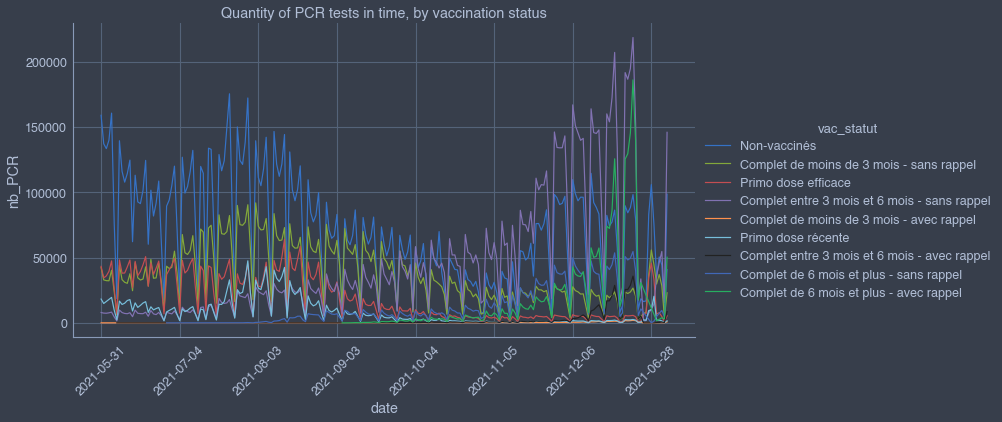

In [17]:
sns.relplot(data=df_national, x="date", y="nb_PCR", hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks([0,30,60,90,120,150,180,210,240], rotation=45)
plt.title("Quantity of PCR tests in time, by vaccination status",)
plt.plot()

###### Graph: Quantity of PCR tests in time, by vaccination status (Last 60 days)

[]

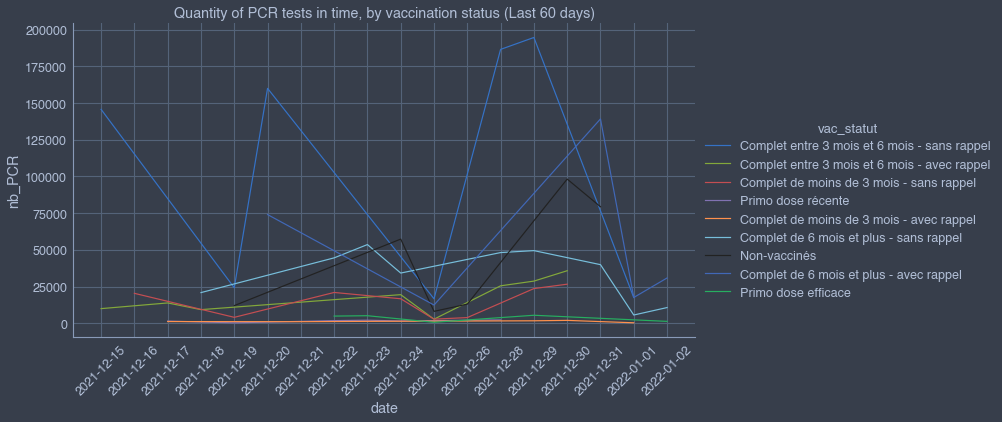

In [18]:
ax = sns.relplot(data=df_national_tail , x="date", y="nb_PCR", hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks(rotation=45)
plt.title("Quantity of PCR tests in time, by vaccination status (Last 60 days)")
plt.plot()

##### Graph: Quantity of PCR tests symptomatic in time, by vaccination status

In [19]:
import numpy as np

##### Graph: Quantity of PCR tests symptomatic in time, by vaccination status (last 60 days)

[]

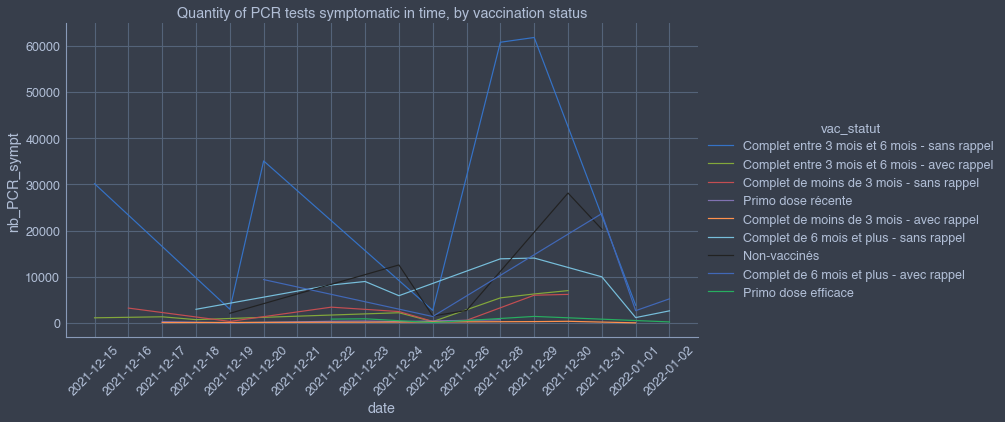

In [21]:
sns.relplot(data=df_national_tail, x="date", y="nb_PCR_sympt", hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks(rotation=45)
plt.title("Quantity of PCR tests symptomatic in time, by vaccination status")
plt.plot()

###### Graph: Quantity of admissions of totally hospitalized patients in time, by vaccination status

[]

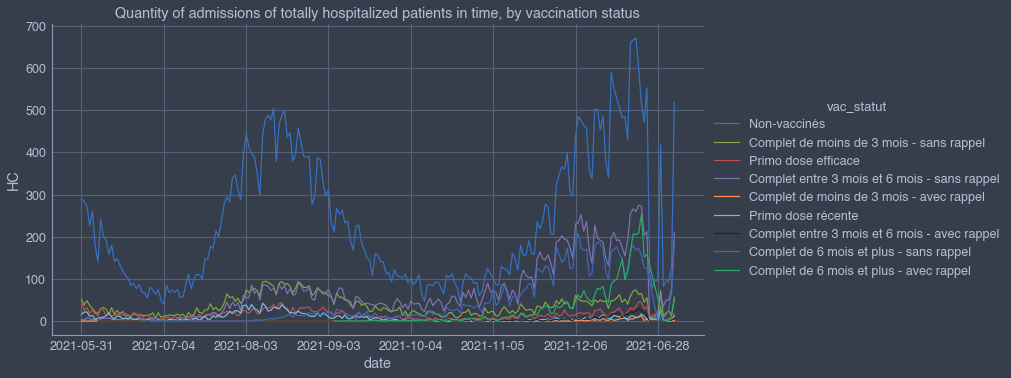

In [22]:
sns.relplot(data=df_national, x="date", y="HC", hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks([0,30,60,90,120,150,180,210,240])
plt.title("Quantity of admissions of totally hospitalized patients in time, by vaccination status")
plt.plot()

###### Graph: Quantity of admissions of totally hospitalized patients in time, by vaccination status (last 60 days)

Text(0.5, 1.0, 'Quantity of admissions of totally hospitalized patients in time, by vaccination status(last 60 days)')

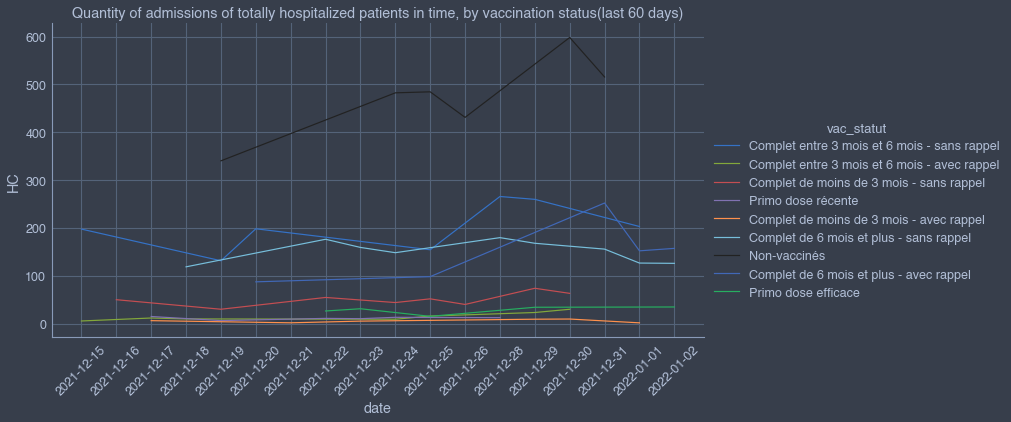

In [23]:
sns.relplot(data=df_national_tail, x="date", y="HC", hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks(rotation=45)
plt.title("Quantity of admissions of totally hospitalized patients in time, by vaccination status(last 60 days)")

###### Graph: Quantity of  of admissions of totally hospitalized patients with positive PCR in time, by vaccination status

[]

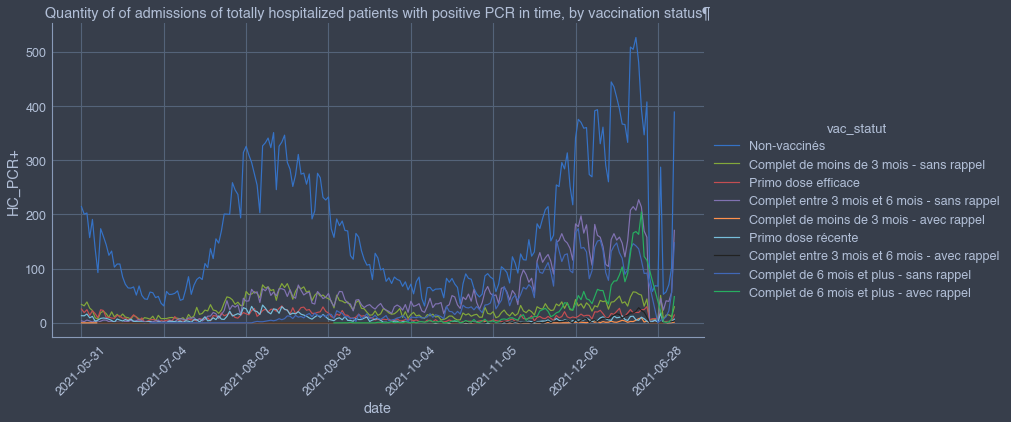

In [24]:
sns.relplot(data=df_national, x="date", y="HC_PCR+", hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks([0,30,60,90,120,150,180,210,240], rotation=45)
plt.title("Quantity of of admissions of totally hospitalized patients with positive PCR in time, by vaccination status¶")
plt.plot()

###### Graph: Quantity of admissions of totally hospitalized patients with positive PCR in time, by vaccination status (last 60 days)

[]

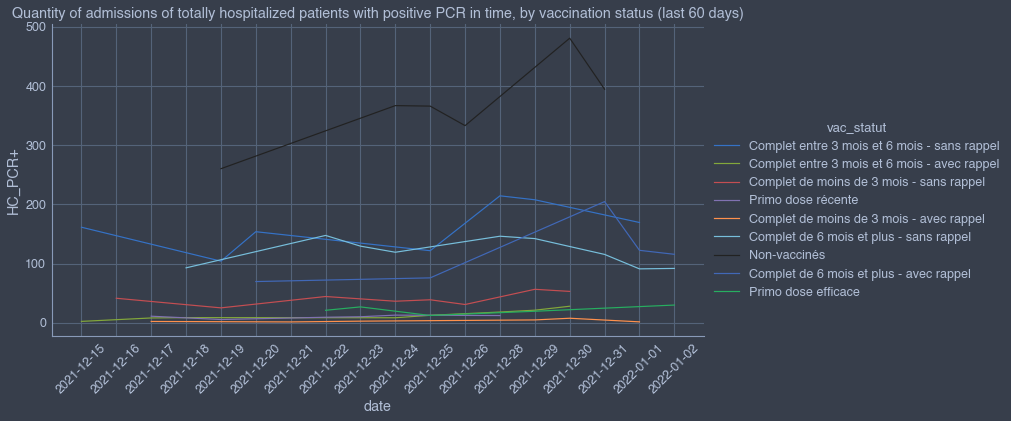

In [25]:
sns.relplot(data=df_national_tail, x="date", y="HC_PCR+", hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks(rotation=45)
plt.title("Quantity of admissions of totally hospitalized patients with positive PCR in time, by vaccination status (last 60 days)")
plt.plot()

###### Graph: Quantity of critical entries in time, by vaccination status

[]

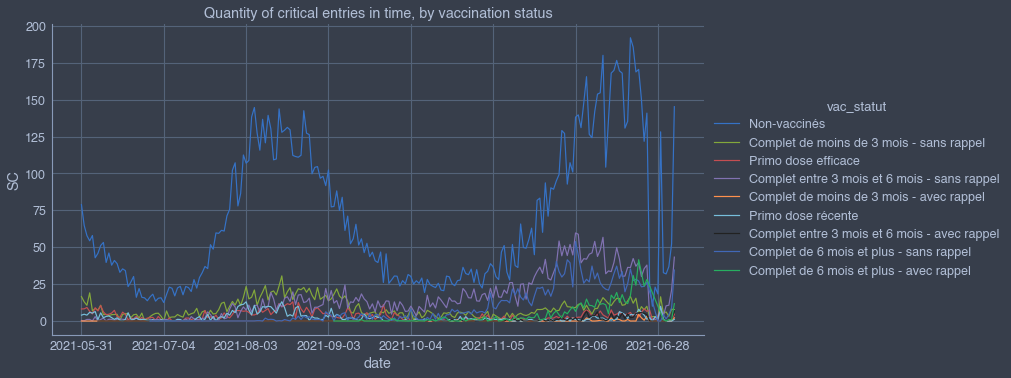

In [26]:
sns.relplot(data=df_national, x="date", y='SC', hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks([0,30,60,90,120,150,180,210,240])
plt.title("Quantity of critical entries in time, by vaccination status")
plt.plot()

###### Graph: Quantity of  critical entries  in time, by vaccination status (las 60 days)

[]

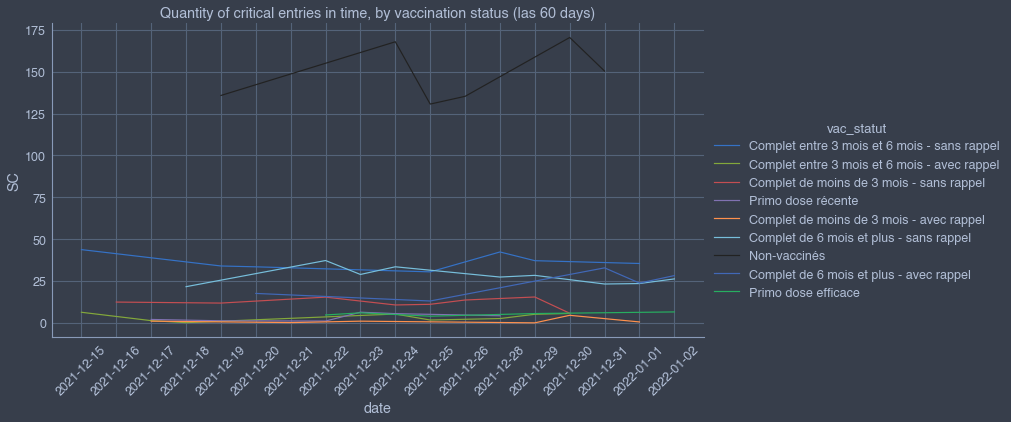

In [27]:
sns.relplot(data=df_national_tail, x="date", y='SC', hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks(rotation=45)
plt.title("Quantity of critical entries in time, by vaccination status (las 60 days)")
plt.plot()

###### Graph: Quantity of  critical entries with positive PCR in time, by vaccination status


[]

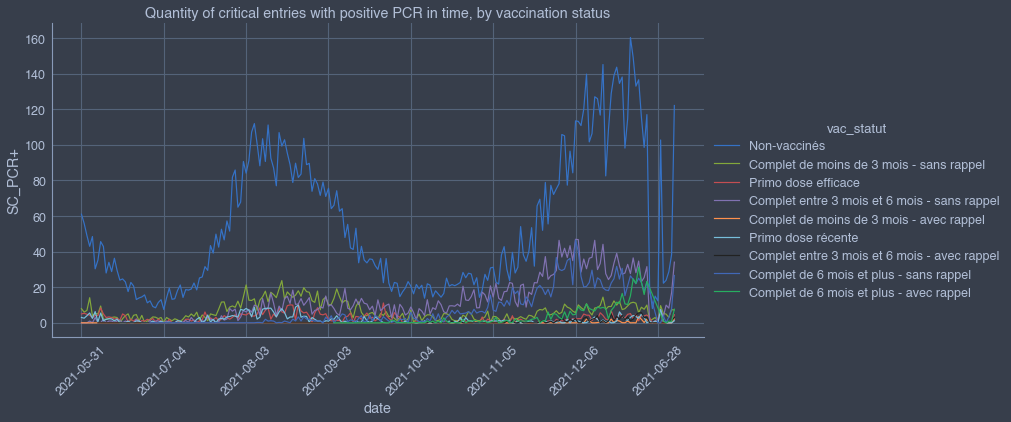

In [28]:
sns.relplot(data=df_national, x="date", y='SC_PCR+', hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks([0,30,60,90,120,150,180,210,240], rotation=45)
plt.title("Quantity of critical entries with positive PCR in time, by vaccination status")
plt.plot()

###### Graph: Quantity of  critical entries with positive PCR in time, by vaccination status (las 60 days)

[]

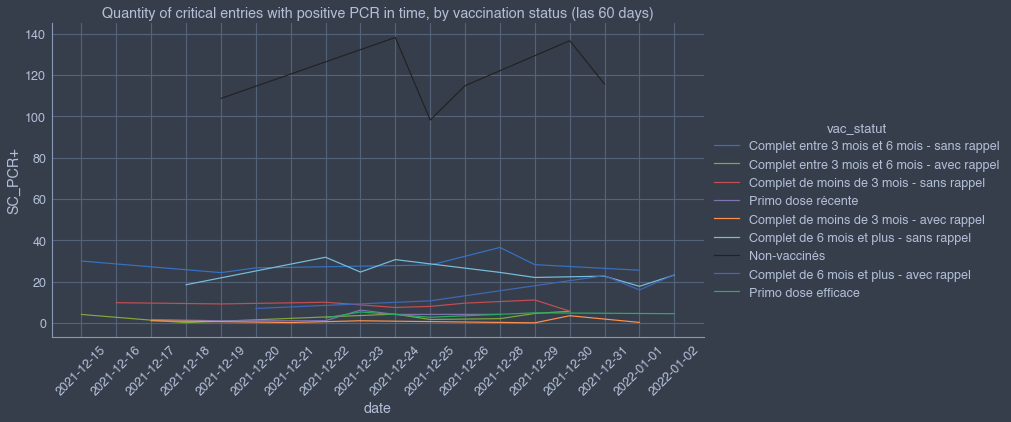

In [29]:
sns.relplot(data=df_national_tail, x="date", y='SC_PCR+', hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks(rotation=45)
plt.title("Quantity of critical entries with positive PCR in time, by vaccination status (las 60 days)")
plt.plot()

 ###### Graph: Quantity of death cases in time , by vaccination status

[]

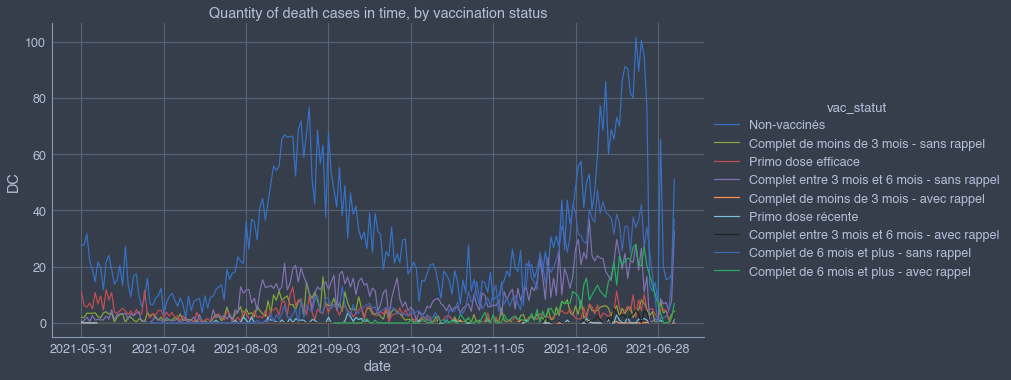

In [30]:
sns.relplot(data=df_national, x="date", y='DC', hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks([0,30,60,90,120,150,180,210,240])
plt.title("Quantity of death cases in time, by vaccination status")
plt.plot()

######  Graph: Quantity of death cases  in time,  by vaccination status (last 60 days)

[]

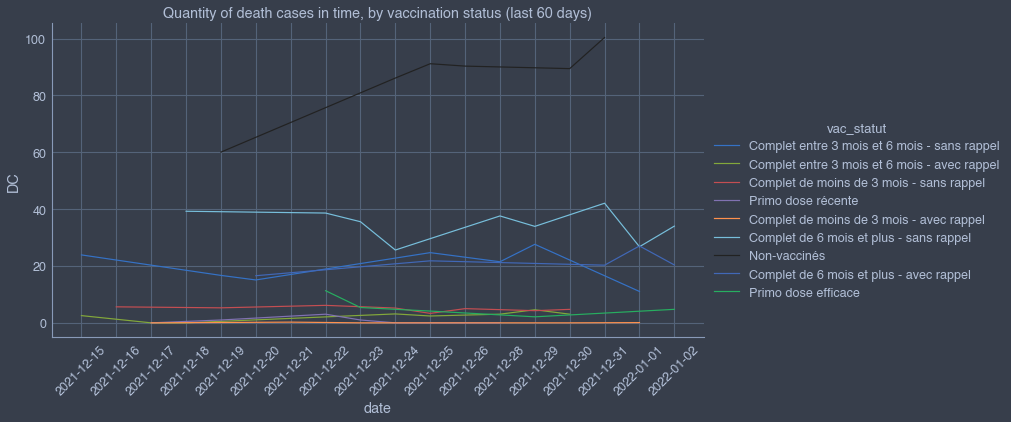

In [31]:
sns.relplot(data=df_national_tail, x="date", y='DC', hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks(rotation=45)
plt.title("Quantity of death cases in time, by vaccination status (last 60 days)")
plt.plot()

###### Graph: Quantity of death cases with positive PCR in time, by vaccination status

[]

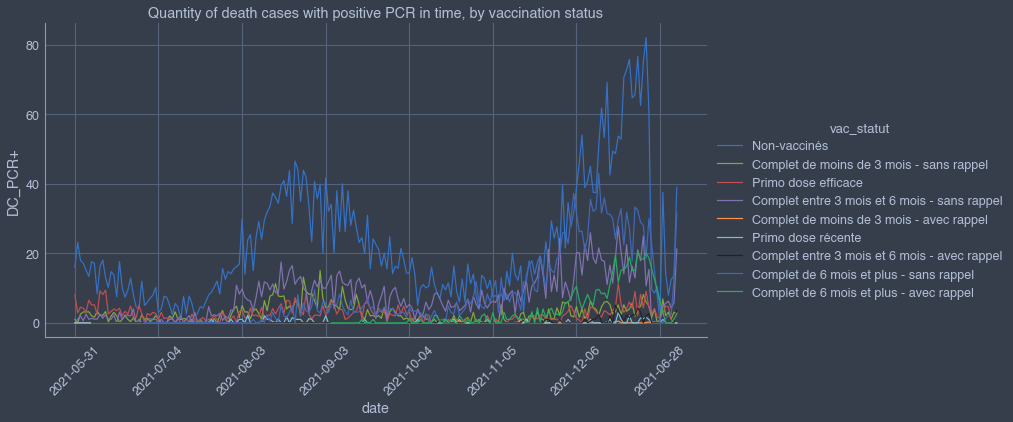

In [32]:
sns.relplot(data=df_national, x="date", y='DC_PCR+', hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks([0,30,60,90,120,150,180,210,240], rotation=45)
plt.title("Quantity of death cases with positive PCR in time, by vaccination status")
plt.plot()

###### Graph: Quantity of death cases with positive PCR in time, by vaccination status (last 60 days)

[]

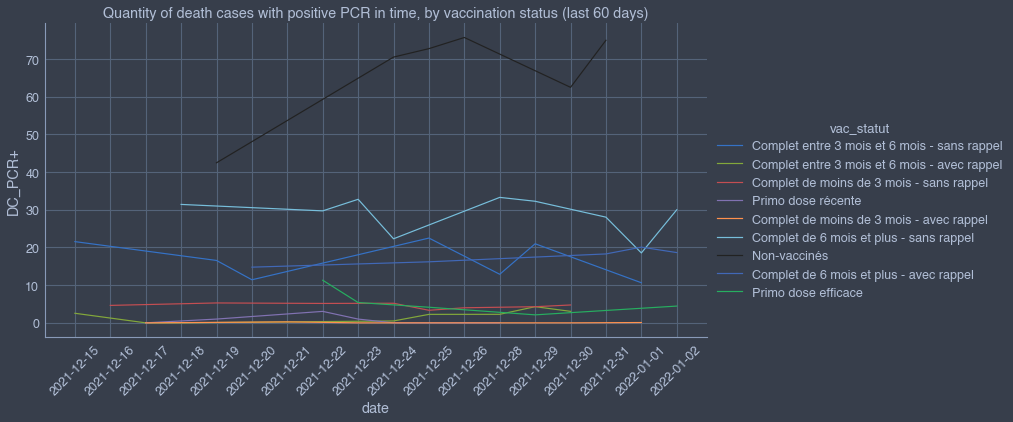

In [33]:
sns.relplot(data=df_national_tail, x="date", y='DC_PCR+', hue="vac_statut",kind="line",height=5, aspect=2) 
plt.xticks(rotation=45)
plt.title("Quantity of death cases with positive PCR in time, by vaccination status (last 60 days)")
plt.plot()

***

                                              # Week 2

***

### 9. Checkpoint: Michel´s comments

Hello Tomas, thanks for the job, we are going in the right direction.

- My most important remark is the graphs are interesting, but too difficult to read because there are too many categories for vaccinated. There should be only two lines :
    - 1 for all vaccinated types, but the one named "primo dose récente".
    - 2 for non vaccinated + primo dose recente.

- For the graphs on 60 days : can you use the average of the 7 previous days, so that the curve is more smooth and readable ?

- For the graphs on the whole period : I am surprised . They seem to have only a few points, and long straight lines. Here also, using the average of the 7 previous days would be probably the best option.

- There are too many graphs. For hospital, normal, critic, and death you can remove the graphs "with positive PCR".

- For the graphs for the test, There is something I do not understand. You have several graphs with the same title.

- There is a problem with the data df_national2_tail. It does not contain the data for 60 days, but less that 30, and this data seems not complete, there are not a value for each day, only one from time to time.

- I attach your file commented. For the graphs for all the last months, I added a comment : Good, remove or ? .

Thanks for the work, we will manage something good.

### 10. Solution to the comments

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Original dataframe with original "vac_statut" atributes

In [100]:
df = pd.read_csv("covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si.csv", 
                 sep=";", 
                 parse_dates =["date"])
df.head()

,date,vac_statut,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
0,2021-05-31,Non-vaccinés,"158,950.59","21,274.80","9,054.94","3,647.15",289.99,214.56,78.87,61.05,27.50,16.00,"41,355,849.70"
1,2021-05-31,Complet de moins de 3 mois - sans rappel,"42,225.89","2,032.96",879.16,310.04,51.24,34.08,16.56,7.95,2.00,1.00,"8,907,998.80"
2,2021-06-01,Primo dose efficace,"34,421.55","2,459.35",349.38,112.95,25.77,18.89,8.26,5.37,6.20,2.87,"10,743,909.70"
3,2021-06-01,Complet de moins de 3 mois - sans rappel,"32,880.29","1,766.65",620.56,199.52,38.13,31.31,12.98,6.00,2.00,0.00,"8,911,840.30"
4,2021-06-01,Complet entre 3 mois et 6 mois - sans rappel,"7,457.75",331.91,62.84,11.42,2.41,2.20,0.20,0.07,1.00,1.00,"1,577,767.48"


In [101]:
df.groupby("vac_statut").sum()

,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
vac_statut,,,,,,,,,,,
Complet de 6 mois et plus - avec rappel,"2,324,397.69","313,433.59","165,165.87","63,064.60","3,685.73","2,839.79",574.95,426.53,580.83,437.95,"529,815,426.97"
Complet de 6 mois et plus - sans rappel,"2,183,459.87","355,706.68","249,085.87","116,997.39","8,843.56","7,106.51","1,736.42","1,476.18","1,918.61","1,581.85","557,590,412.23"
Complet de moins de 3 mois - avec rappel,"36,314.14","3,897.76","3,675.66","1,517.71",115.66,76.47,29.13,25.25,6.63,6.63,"7,681,895.87"
Complet de moins de 3 mois - sans rappel,"7,890,084.98","854,926.36","311,439.80","133,905.70","8,021.56","5,896.05","1,878.83","1,456.74",728.20,597.36,"3,769,328,315.73"
Complet entre 3 mois et 6 mois - avec rappel,"400,900.07","56,649.10","44,605.86","16,963.36",447.21,358.94,117.05,91.22,59.41,49.56,"78,482,102.57"
Complet entre 3 mois et 6 mois - sans rappel,"9,610,727.14","1,665,872.99","1,070,485.30","533,184.46","15,350.51","11,909.87","3,372.49","2,666.34","2,075.88","1,654.84","3,423,095,393.19"
Non-vaccinés,"15,377,092.56","1,967,949.34","1,424,151.90","634,254.23","50,640.55","37,341.49","15,012.99","11,822.99","6,716.49","4,871.04","4,695,530,009.45"
Primo dose efficace,"4,002,235.17","257,980.83","101,070.18","40,997.97","3,295.52","2,434.41",771.91,555.04,735.52,548.48,"1,091,883,669.86"
Primo dose récente,"1,743,429.56","116,714.65","87,885.30","42,519.84","1,802.95","1,398.70",522.73,370.08,60.22,43.55,"379,459,810.38"


In [102]:
df["vac_statut"].unique()

array(['Non-vaccinés', 'Complet de moins de 3 mois - sans rappel',
       'Primo dose efficace',
       'Complet entre 3 mois et 6 mois - sans rappel',
       'Complet de moins de 3 mois - avec rappel', 'Primo dose récente',
       'Complet entre 3 mois et 6 mois - avec rappel',
       'Complet de 6 mois et plus - sans rappel',
       'Complet de 6 mois et plus - avec rappel'], dtype=object)

**10.1 New dataframe with two attributes for "vac_statut" variable**

all_vaccinated_types = 'Complet de moins de 3 mois - sans rappel', 'Complet entre 3 mois et 6 mois - sans rappel', 'Complet de moins de 3 mois - avec rappel','Complet entre 3 mois et 6 mois - avec rappel','Complet de 6 mois et plus - sans rappel','Complet de 6 mois et plus - avec rappel', 'Primo dose efficace'.

Non Vaccinated = "Primo dose récente","Non-vaccinés".

In [103]:
df['vac_statut'].replace(["Primo dose récente","Non-vaccinés"],'non_vaccinated',inplace=True)
df["vac_statut"].replace(['Complet de moins de 3 mois - sans rappel',
                                   'Complet entre 3 mois et 6 mois - sans rappel',
                                   'Complet de moins de 3 mois - avec rappel',
                                   'Complet entre 3 mois et 6 mois - avec rappel',
                                   'Complet de 6 mois et plus - sans rappel',
                                   'Complet de 6 mois et plus - avec rappel','Primo dose efficace'],"all_vaccinated_types", inplace=True )
df["vac_statut"].unique()

array(['non_vaccinated', 'all_vaccinated_types'], dtype=object)

###### 10.2 Smooth the curves of the data using weakly average

In [104]:
#import required libraries
import pandas as pd
from datetime import datetime
#read the daily data file
df['date'] = df["date"].astype('datetime64[ns]')
#convert daily data to weekl
df = df.groupby("vac_statut").resample('W-Wed', label='right', closed = 'right', on='date').sum().reset_index().sort_values(by='date')

In [105]:
df.head()

,vac_statut,date,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
0,all_vaccinated_types,2021-06-02,"243,747.78","14,241.52","3,512.68","1,103.47",254.24,183.60,67.49,36.19,33.34,21.87,"63,788,617.04"
32,non_vaccinated,2021-06-02,"478,902.79","59,937.36","22,807.38","8,911.47",903.84,660.15,214.11,175.46,87.51,57.13,"137,657,208.53"
33,non_vaccinated,2021-06-09,"854,222.58","82,283.41","29,729.58","10,188.67","1,506.37","1,109.42",374.72,297.17,130.41,104.81,"306,768,731.98"
1,all_vaccinated_types,2021-06-09,"502,156.07","24,479.55","5,132.32","1,417.21",370.25,266.29,116.89,79.84,87.67,64.26,"163,212,720.17"
2,all_vaccinated_types,2021-06-16,"505,321.85","21,312.18","3,330.45",807.63,260.33,167.06,70.35,41.41,75.41,55.80,"180,396,000.69"


###### 10.3 Make df_tail contain data from november (aprox)

In [106]:
df_tail = df.tail(20)
df_tail.head()

,vac_statut,date,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
54,non_vaccinated,2021-11-03,"172,357.09","24,510.31","13,096.69","6,204.35",646.02,478.91,217.20,160.66,84.30,74.30,"113,537,129.68"
22,all_vaccinated_types,2021-11-03,"548,380.28","64,772.60","20,036.84","9,737.16",874.72,674.46,213.09,176.76,130.65,101.65,"354,746,141.60"
55,non_vaccinated,2021-11-10,"199,073.25","32,258.94","19,104.39","9,324.31",762.75,592.37,272.90,225.68,91.55,64.27,"112,264,230.94"
23,all_vaccinated_types,2021-11-10,"671,678.54","93,776.11","30,888.35","15,298.80","1,153.27",865.56,260.10,223.59,129.85,118.69,"355,939,626.09"
56,non_vaccinated,2021-11-17,"249,726.30","39,498.41","26,673.57","12,629.55","1,039.44",765.50,320.64,251.57,134.73,90.81,"111,194,704.68"


###### 10.4 Context Table

In [107]:
df.groupby("vac_statut").sum()

,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
vac_statut,,,,,,,,,,,
all_vaccinated_types,"26,448,119.06","3,508,467.31","1,945,528.54","906,631.19","39,759.75","30,622.04","8,480.78","6,697.30","6,105.08","4,876.67","9,457,877,216.42"
non_vaccinated,"17,120,522.12","2,084,663.99","1,512,037.20","676,774.07","52,443.50","38,740.19","15,535.72","12,193.07","6,776.71","4,914.59","5,074,989,819.83"


***

### 11. New Graphs

- Two new categories for "vac_statut": all_vaccinated_types and non_vaccinated.
- One dataset with data from july (df) and another with data from november (df_tail).
- Graphs with average of the 7 previous days.
- Three topics: tests, hospitalizations, deaths.

##### 11.1 PCR Test Performed Graphs

- Total and positive.
- Total and symptomatic.
- By months and weeks.

[]

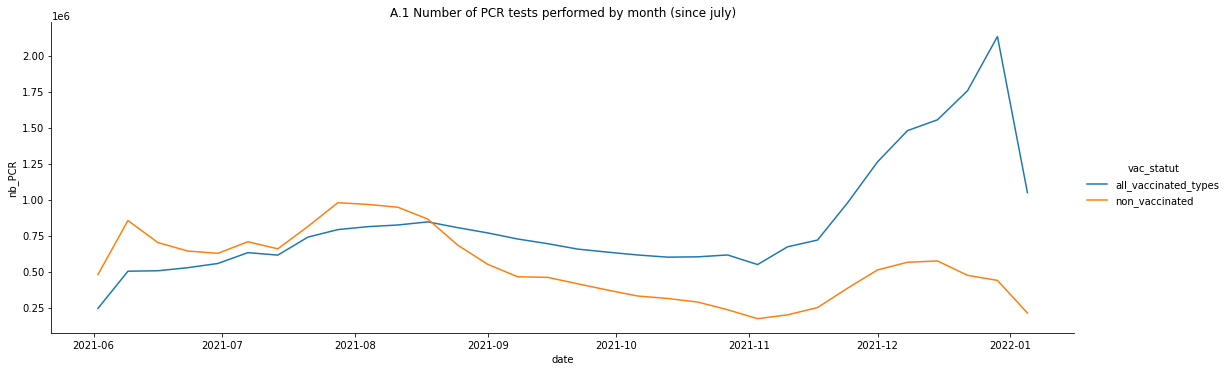

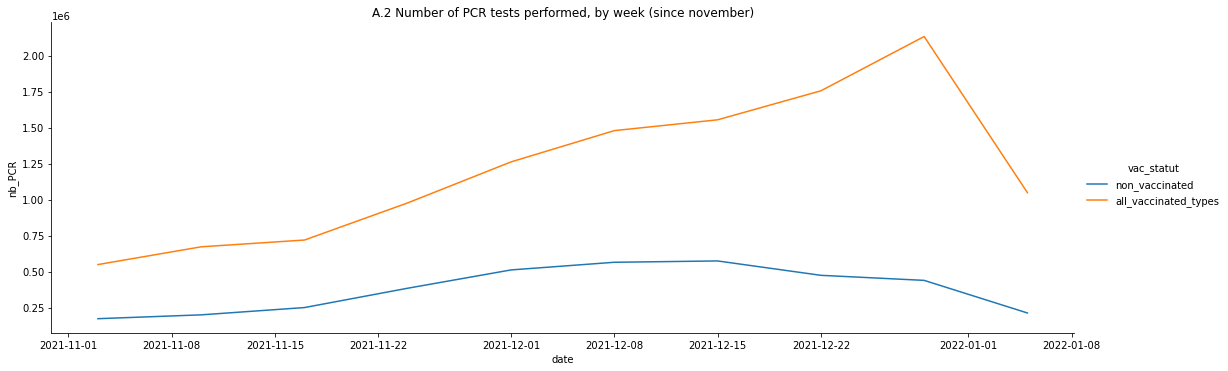

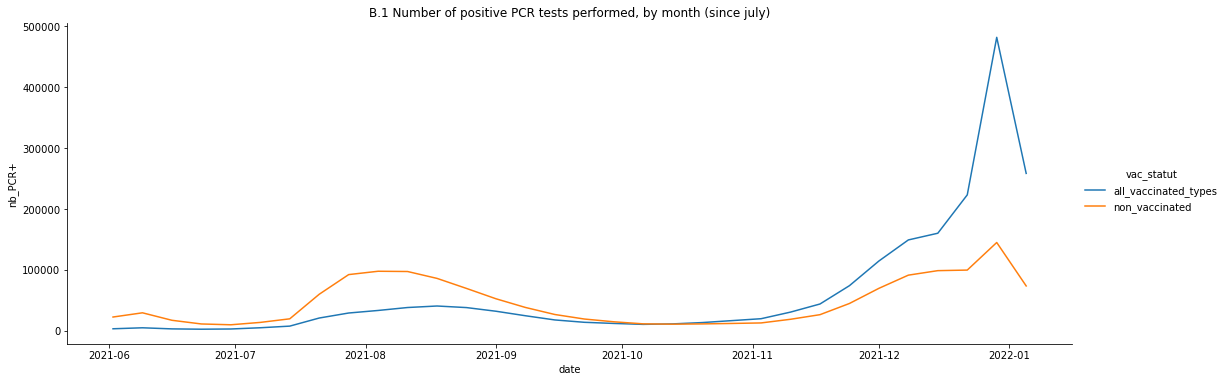

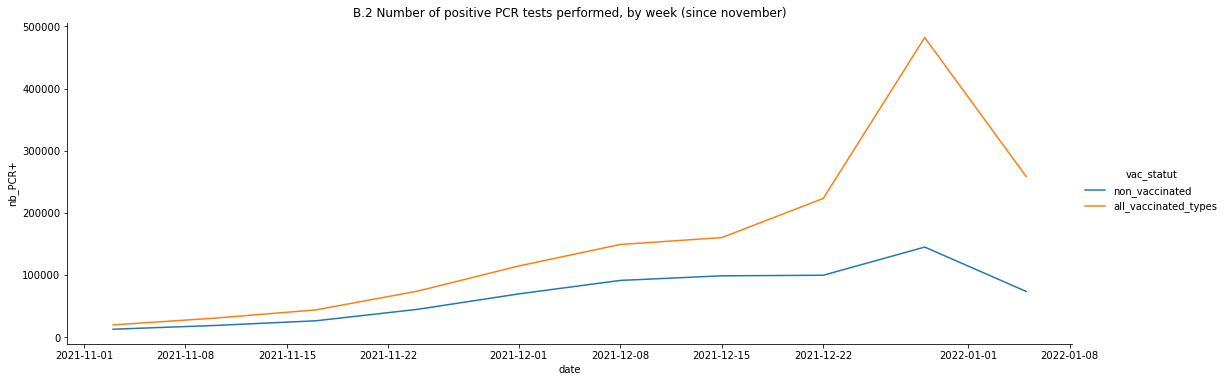

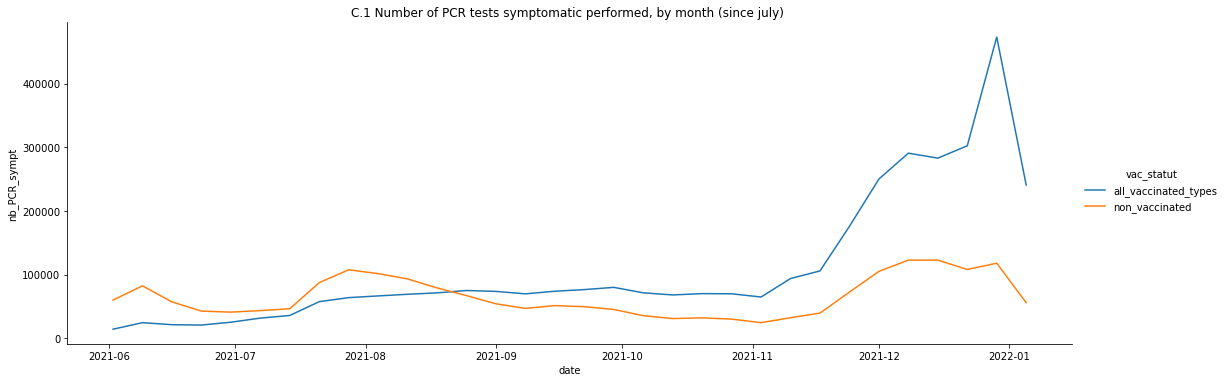

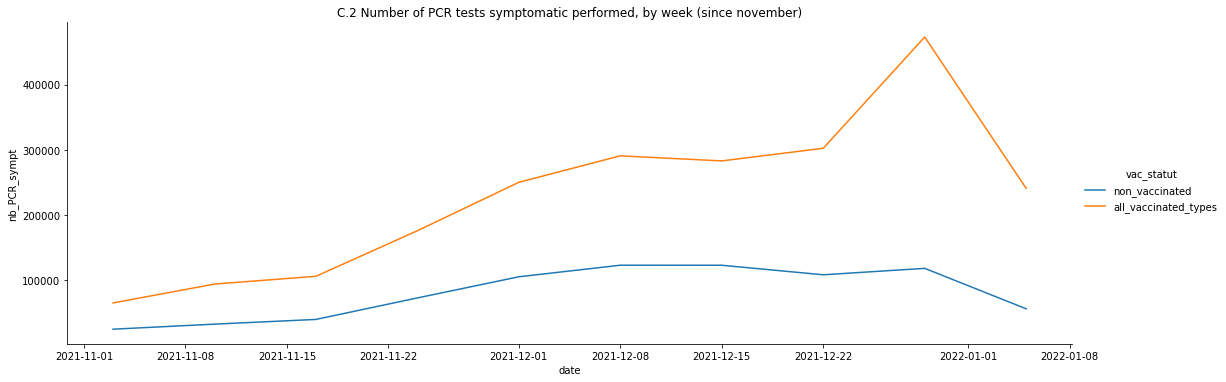

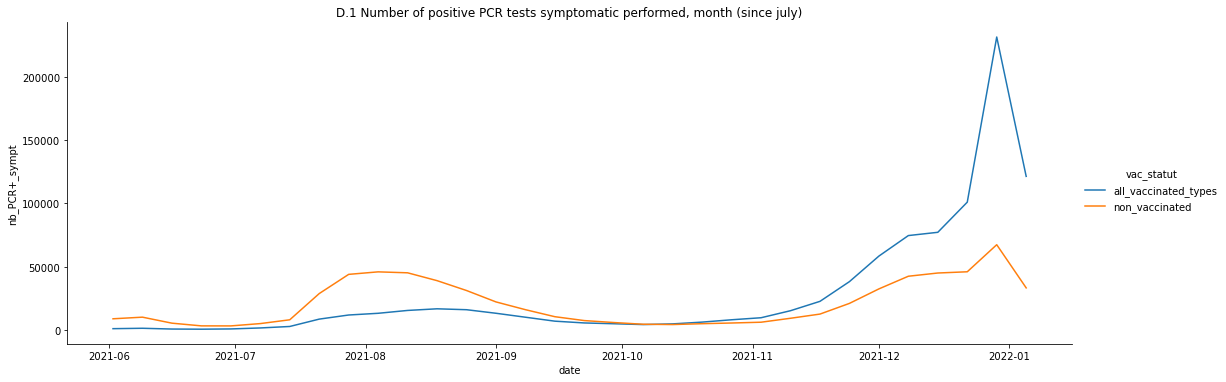

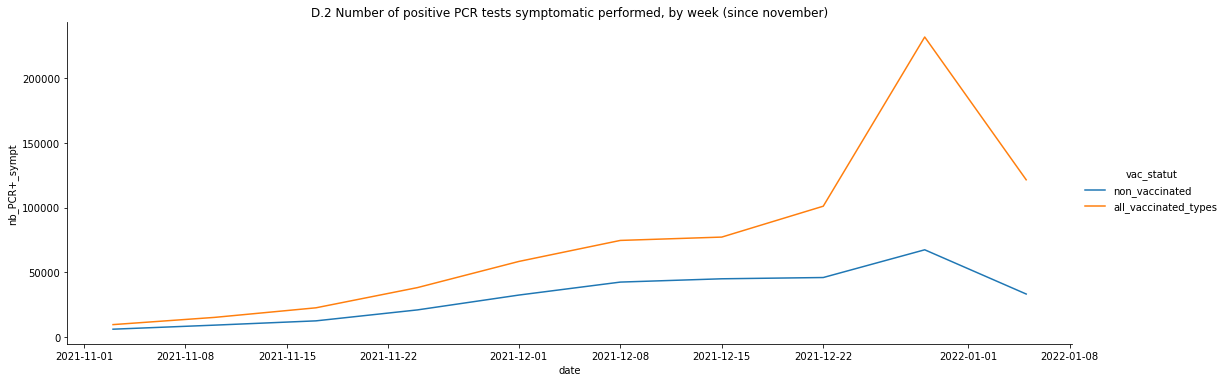

In [108]:
sns.relplot(data=df, x="date", y="nb_PCR",hue="vac_statut", kind="line", aspect=3)
plt.title("A.1 Number of PCR tests performed by month (since july)")
sns.relplot(data=df_tail, x="date", y="nb_PCR",hue="vac_statut", kind="line", aspect=3)
plt.title("A.2 Number of PCR tests performed, by week (since november)")
sns.relplot(data=df, x="date", y="nb_PCR+",hue="vac_statut", kind="line", aspect=3)
plt.title("B.1 Number of positive PCR tests performed, by month (since july)")
sns.relplot(data=df_tail, x="date", y="nb_PCR+",hue="vac_statut", kind="line", aspect=3)
plt.title("B.2 Number of positive PCR tests performed, by week (since november)")

sns.relplot(data=df, x="date", y="nb_PCR_sympt", hue="vac_statut",kind="line", aspect=3)
plt.title("C.1 Number of PCR tests symptomatic performed, by month (since july) ")
sns.relplot(data=df_tail, x="date", y="nb_PCR_sympt", hue="vac_statut",kind="line", aspect=3)
plt.title("C.2 Number of PCR tests symptomatic performed, by week (since november)")

sns.relplot(data=df, x="date", y="nb_PCR+_sympt", hue="vac_statut",kind="line", aspect=3)
plt.title("D.1 Number of positive PCR tests symptomatic performed, month (since july)")
sns.relplot(data=df_tail, x="date", y="nb_PCR+_sympt", hue="vac_statut",kind="line", aspect=3)
plt.title("D.2 Number of positive PCR tests symptomatic performed, by week (since november)")

plt.plot()

###### 11.2 Hospital Admissions

- Totall and critic.
- By months and weeks.

[]

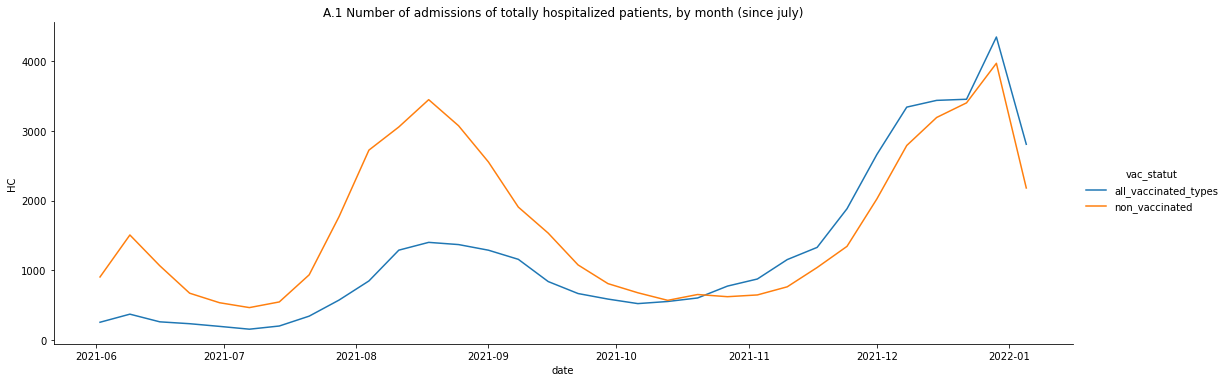

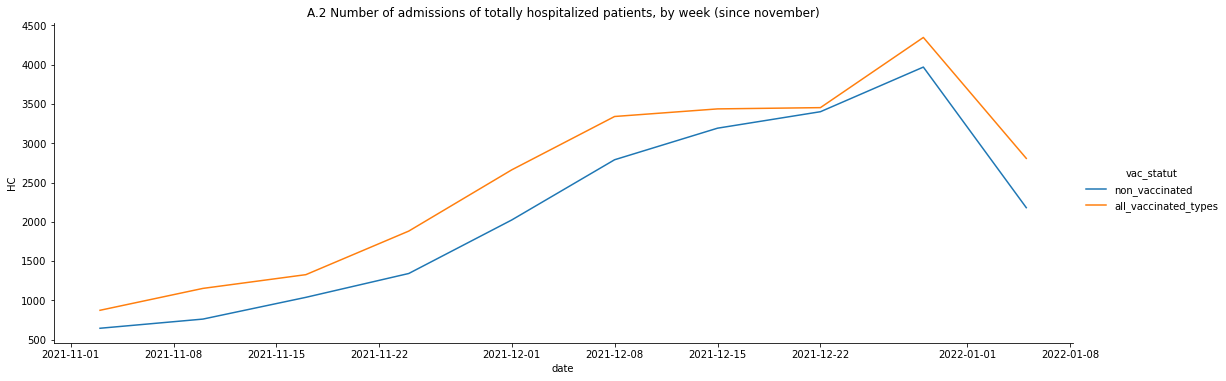

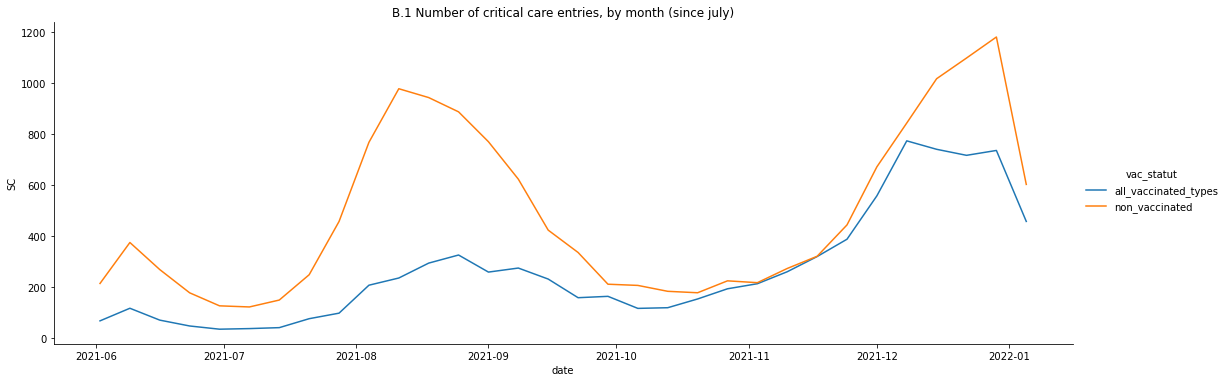

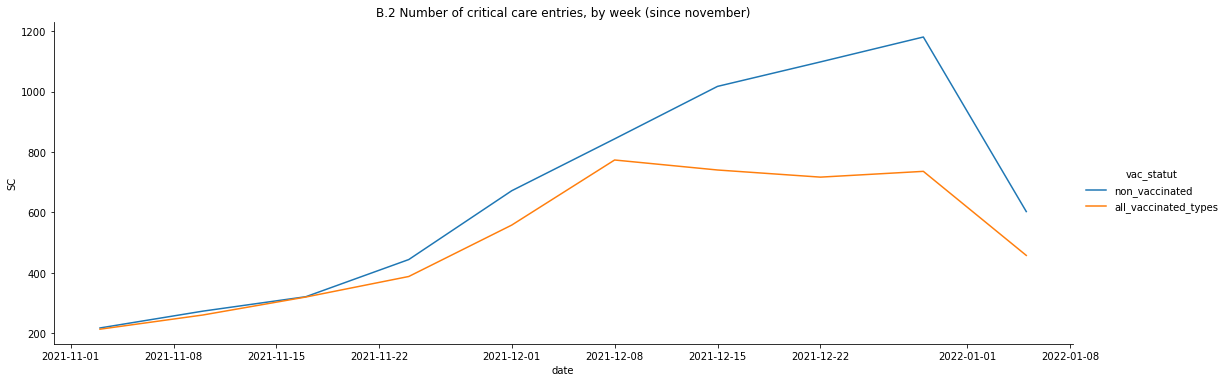

In [109]:
sns.relplot(data=df, x="date", y="HC", hue="vac_statut",kind="line", aspect=3)
plt.title("A.1 Number of admissions of totally hospitalized patients, by month (since july)")
sns.relplot(data=df_tail, x="date", y="HC", hue="vac_statut",kind="line", aspect=3)
plt.title("A.2 Number of admissions of totally hospitalized patients, by week (since november)")

sns.relplot(data=df, x="date", y="SC", hue="vac_statut",kind="line", aspect=3)
plt.title("B.1 Number of critical care entries, by month (since july)")
sns.relplot(data=df_tail, x="date", y="SC", hue="vac_statut",kind="line", aspect=3)
plt.title("B.2 Number of critical care entries, by week (since november)")

plt.plot()

###### 11.3 Death Cases

- By months and weeks

[]

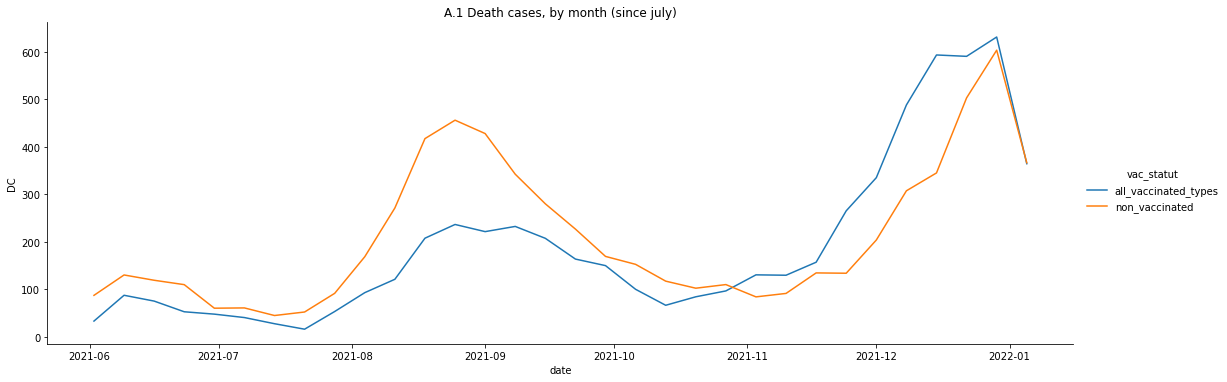

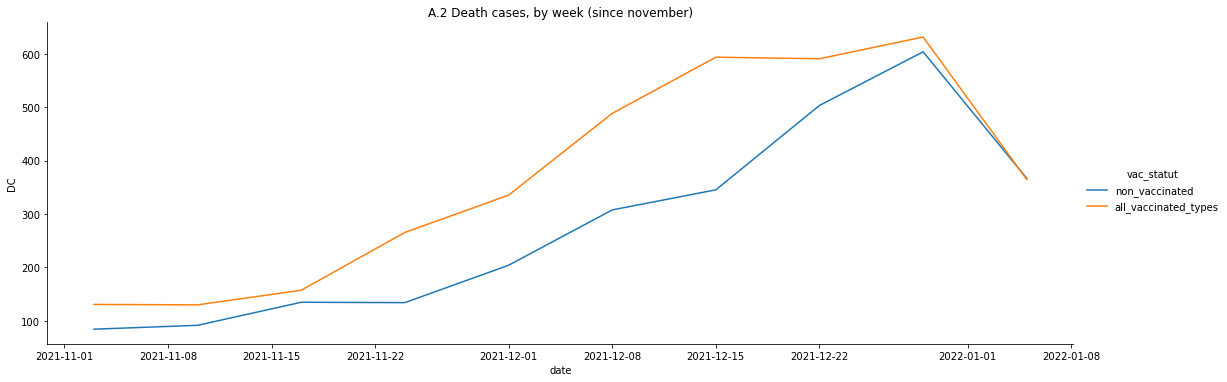

In [110]:
sns.relplot(data=df, x="date", y="DC", hue="vac_statut",kind="line", aspect=3)
plt.title("A.1 Death cases, by month (since july)")
sns.relplot(data=df_tail, x="date", y="DC", hue="vac_statut",kind="line", aspect=3)
plt.title("A.2 Death cases, by week (since november)")
plt.plot()

***

# 12 Com

In [111]:
df.head()

,vac_statut,date,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
0,all_vaccinated_types,2021-06-02,"243,747.78","14,241.52","3,512.68","1,103.47",254.24,183.60,67.49,36.19,33.34,21.87,"63,788,617.04"
32,non_vaccinated,2021-06-02,"478,902.79","59,937.36","22,807.38","8,911.47",903.84,660.15,214.11,175.46,87.51,57.13,"137,657,208.53"
33,non_vaccinated,2021-06-09,"854,222.58","82,283.41","29,729.58","10,188.67","1,506.37","1,109.42",374.72,297.17,130.41,104.81,"306,768,731.98"
1,all_vaccinated_types,2021-06-09,"502,156.07","24,479.55","5,132.32","1,417.21",370.25,266.29,116.89,79.84,87.67,64.26,"163,212,720.17"
2,all_vaccinated_types,2021-06-16,"505,321.85","21,312.18","3,330.45",807.63,260.33,167.06,70.35,41.41,75.41,55.80,"180,396,000.69"


In [112]:
df.describe()

,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
count,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00
mean,"680,760.02","87,392.68","54,024.46","24,740.71","1,440.68","1,083.78",375.26,295.16,201.28,152.99,"227,076,047.44"
std,"357,883.33","80,693.61","75,375.40","36,203.91","1,112.49",855.17,299.13,239.76,160.76,124.94,"98,174,687.64"
min,"172,357.09","14,241.52","2,802.79",691.00,154.64,105.23,34.80,23.69,16.26,14.76,"59,575,885.24"
25%,"477,588.14","43,245.84","12,892.50","5,365.78",598.55,458.24,162.29,125.45,87.63,65.66,"125,773,904.05"
50%,"628,712.92","68,542.76","26,810.04","10,372.77","1,052.23",769.91,259.41,203.43,134.39,110.81,"225,734,642.72"
75%,"806,468.49","93,308.12","70,904.74","32,721.04","2,062.98","1,589.01",568.95,473.51,273.60,212.65,"333,074,139.98"
max,"2,132,491.41","473,018.68","482,109.78","231,512.93","4,346.84","3,467.64","1,180.55",952.27,631.31,508.24,"362,499,464.36"


PCR Quantity in the dataset

In [113]:
df["nb_PCR"].sum()

43568641.18

France Total Population

In [114]:
df["normalized_casesx100k"] = df.apply(lambda row: row["nb_PCR"]/ 67000000 * 100000, axis=1)

In [ ]:
countries1 = {"Colombia": 50882891, "Belgium": 11589623,"Argentina":45195774,"France":65273511,"Italy":60461826}

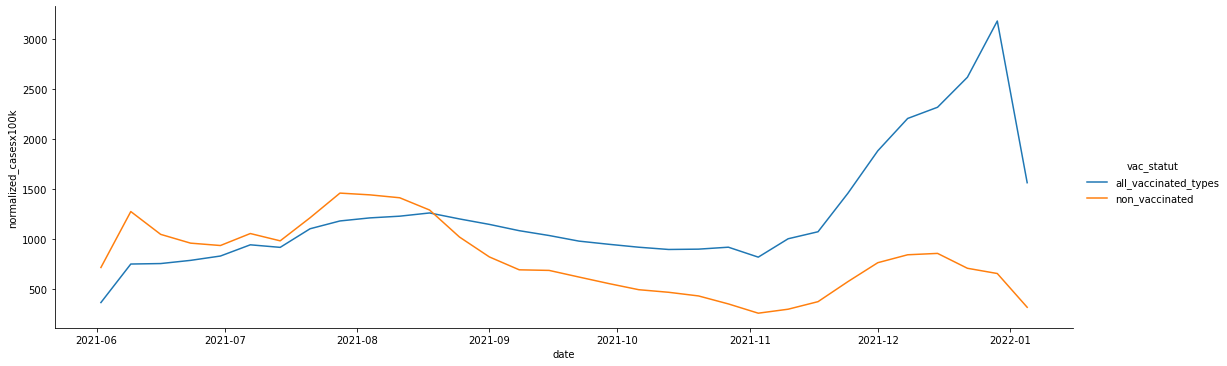

In [115]:
sns.relplot(data=df, x="date", y="normalized_casesx100k",hue="vac_statut", kind="line", aspect=3)

In [95]:
df.head()

,date,vac_statut,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif,normalized_casesx100k
0,2021-05-31,Non-vaccinés,"158,950.59","21,274.80","9,054.94","3,647.15",289.99,214.56,78.87,61.05,27.50,16.00,"41,355,849.70",237.24
1,2021-05-31,Complet de moins de 3 mois - sans rappel,"42,225.89","2,032.96",879.16,310.04,51.24,34.08,16.56,7.95,2.00,1.00,"8,907,998.80",63.02
2,2021-06-01,Primo dose efficace,"34,421.55","2,459.35",349.38,112.95,25.77,18.89,8.26,5.37,6.20,2.87,"10,743,909.70",51.38
3,2021-06-01,Complet de moins de 3 mois - sans rappel,"32,880.29","1,766.65",620.56,199.52,38.13,31.31,12.98,6.00,2.00,0.00,"8,911,840.30",49.08
4,2021-06-01,Complet entre 3 mois et 6 mois - sans rappel,"7,457.75",331.91,62.84,11.42,2.41,2.20,0.20,0.07,1.00,1.00,"1,577,767.48",11.13


In [73]:
def div_10k(x):
    return x/10000

In [74]:
df_div10K = df.iloc[:,2:].apply(div_10k)

In [75]:
df_div10K.head(3)

,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [76]:
df_vs_date = df[["vac_statut","date"]]

In [77]:
df_comp = pd.concat([df_vs_date, df_div10K ], axis=1, join="inner")

In [78]:
from IPython.display import display
pd.options.display.float_format = '{:,.2f}'.format

In [79]:
df_comp.head()

,vac_statut,date,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
0,all_vaccinated_types,2021-06-02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
32,non_vaccinated,2021-06-02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
33,non_vaccinated,2021-06-09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,all_vaccinated_types,2021-06-09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,all_vaccinated_types,2021-06-16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [80]:
df = df_comp 

In [81]:
df_tail = df.tail(20)


[]

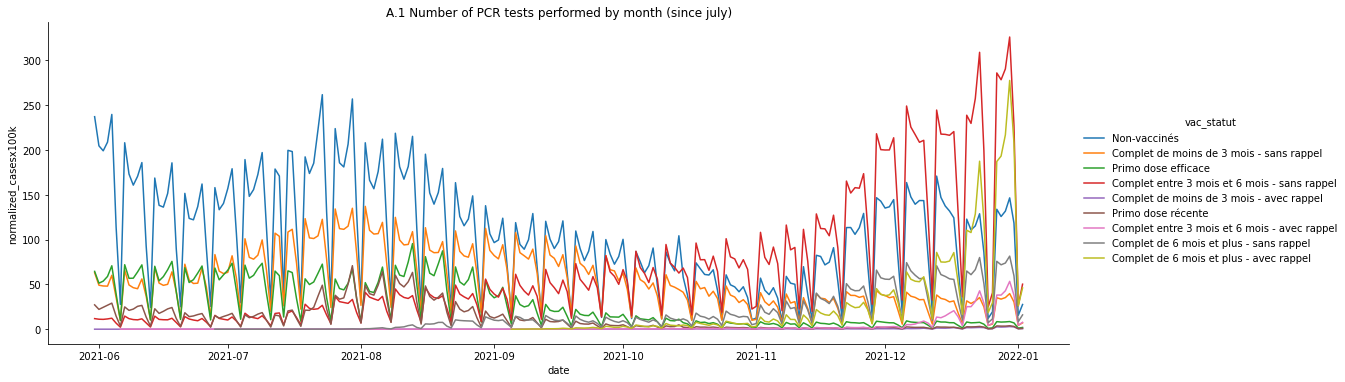

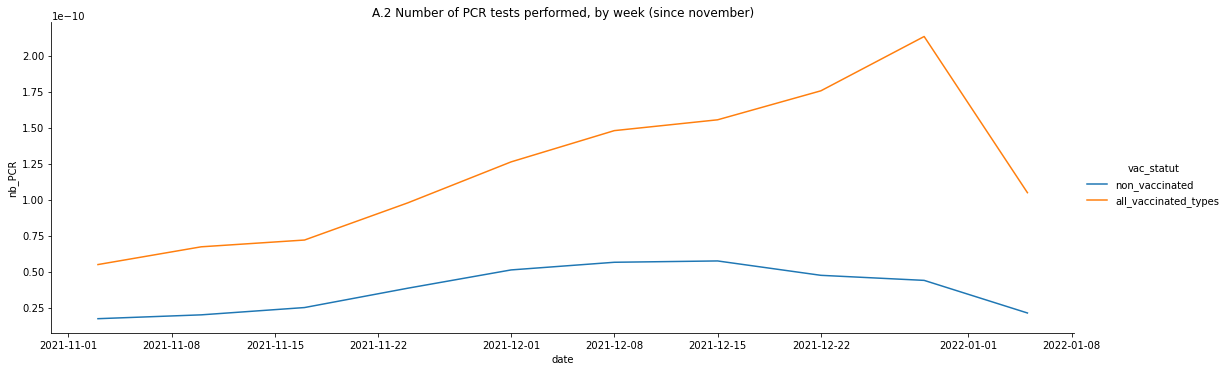

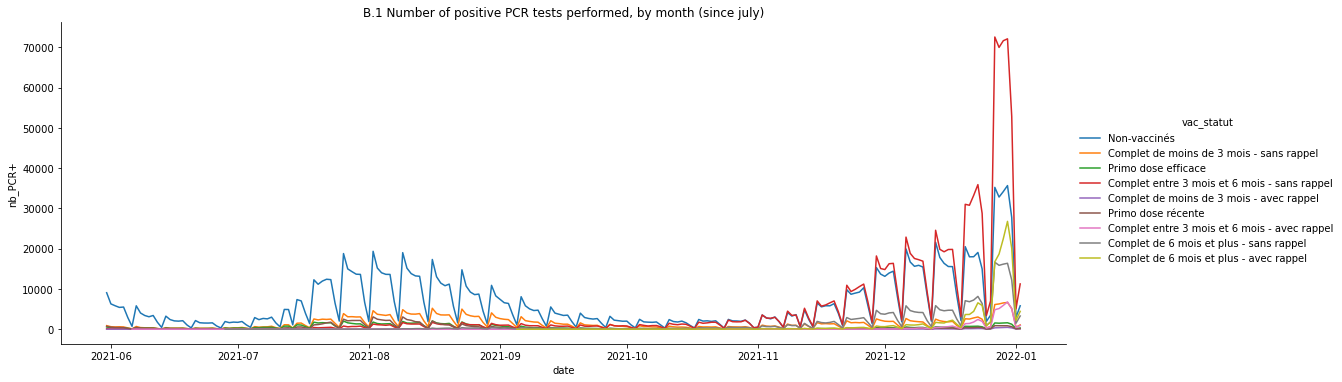

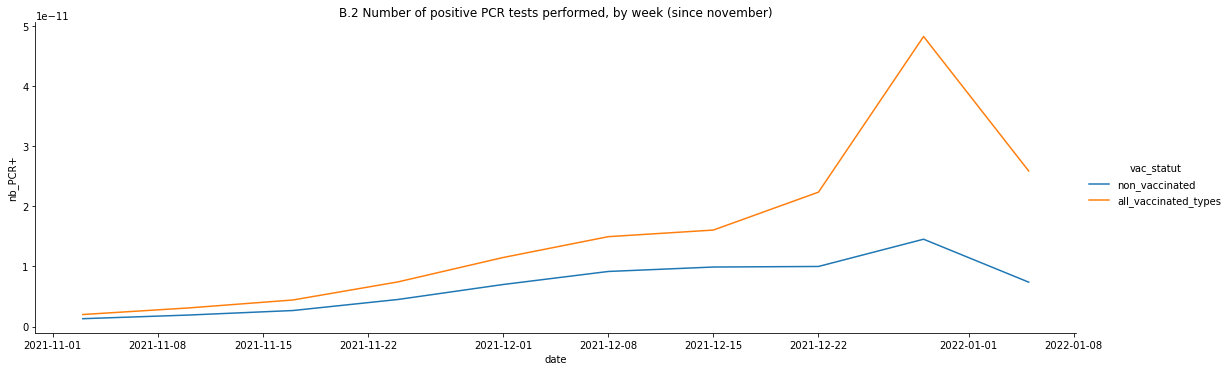

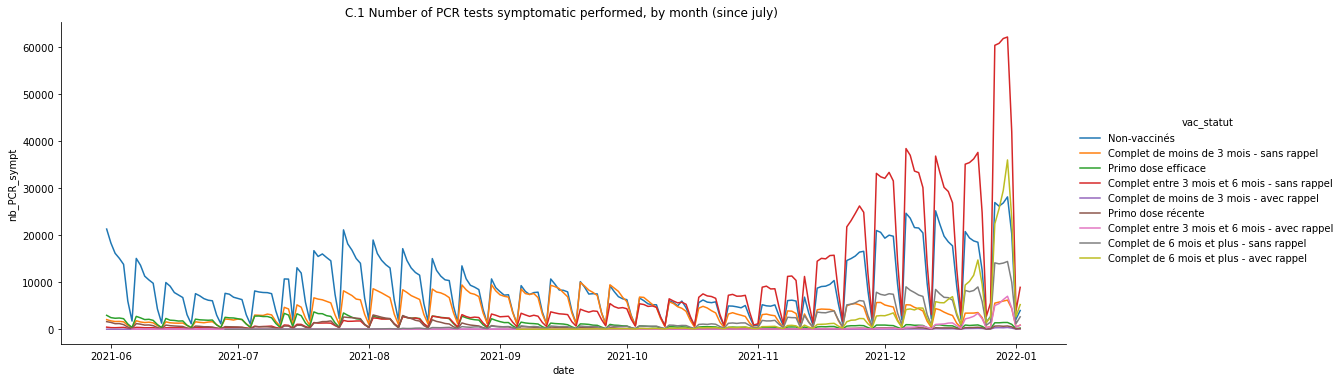

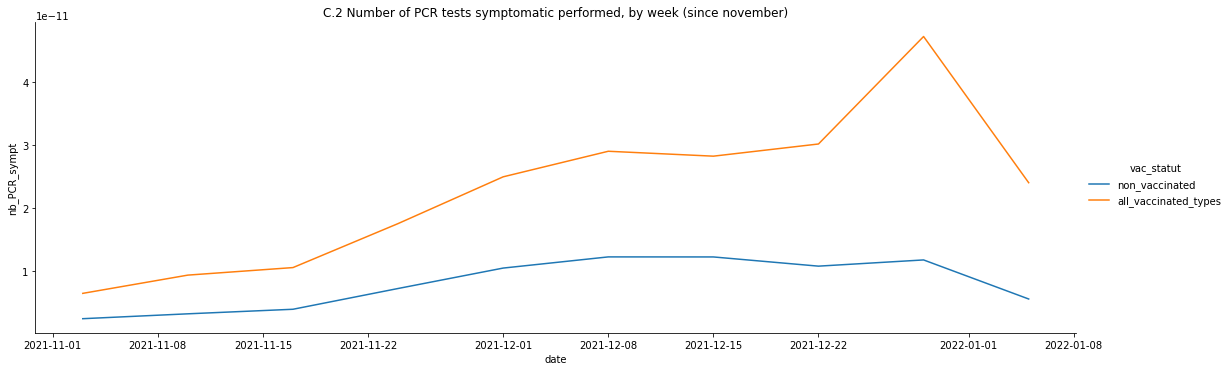

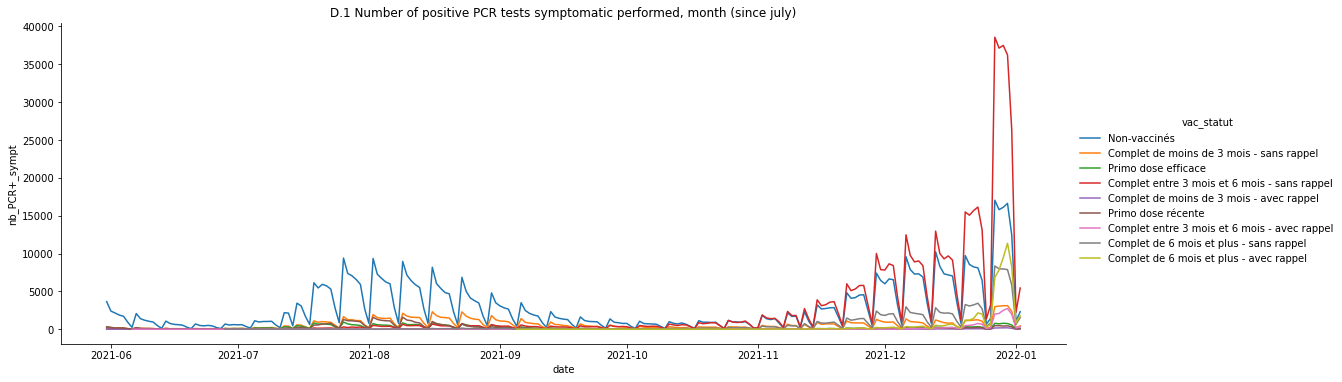

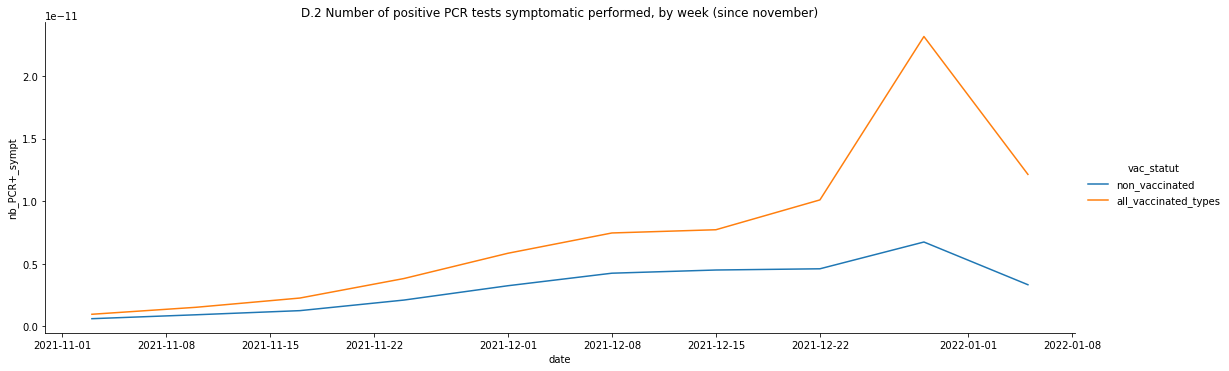

In [96]:
sns.relplot(data=df, x="date", y="normalized_casesx100k",hue="vac_statut", kind="line", aspect=3)
plt.title("A.1 Number of PCR tests performed by month (since july)")
sns.relplot(data=df_tail, x="date", y="nb_PCR",hue="vac_statut", kind="line", aspect=3)
plt.title("A.2 Number of PCR tests performed, by week (since november)")

sns.relplot(data=df, x="date", y="nb_PCR+",hue="vac_statut", kind="line", aspect=3)
plt.title("B.1 Number of positive PCR tests performed, by month (since july)")
sns.relplot(data=df_tail, x="date", y="nb_PCR+",hue="vac_statut", kind="line", aspect=3)
plt.title("B.2 Number of positive PCR tests performed, by week (since november)")

sns.relplot(data=df, x="date", y="nb_PCR_sympt", hue="vac_statut",kind="line", aspect=3)
plt.title("C.1 Number of PCR tests symptomatic performed, by month (since july) ")
sns.relplot(data=df_tail, x="date", y="nb_PCR_sympt", hue="vac_statut",kind="line", aspect=3)
plt.title("C.2 Number of PCR tests symptomatic performed, by week (since november)")

sns.relplot(data=df, x="date", y="nb_PCR+_sympt", hue="vac_statut",kind="line", aspect=3)
plt.title("D.1 Number of positive PCR tests symptomatic performed, month (since july)")
sns.relplot(data=df_tail, x="date", y="nb_PCR+_sympt", hue="vac_statut",kind="line", aspect=3)
plt.title("D.2 Number of positive PCR tests symptomatic performed, by week (since november)")

plt.plot()